In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sqlalchemy import create_engine
from datetime import datetime

In [3]:
database_path = "fires.sqlite"

In [4]:
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
conn = engine.connect()

In [6]:
fires_df = pd.read_sql("SELECT * FROM fires", conn)

In [48]:
fire_sizes_df = pd.DataFrame(fires_df[['FIRE_YEAR','FIRE_SIZE','DISCOVERY_DATE']]).sort_values(by=['FIRE_YEAR'])

In [49]:
print(len(fire_sizes_df));

2303566


In [67]:
fire_sizes_df


,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE
1222991,1992,1.00,1992-04-06
1378377,1992,6.88,1992-01-12
1378376,1992,6.88,1992-05-19
1378365,1992,6.90,1992-03-13
1378363,1992,6.91,1992-04-27
...,...,...,...
2253997,2020,0.10,2020-03-28
2253996,2020,0.25,2020-04-15
2253995,2020,0.10,2020-06-28
2253975,2020,0.25,2020-05-15


In [68]:
fire_sizes_df['FIRE_SIZE'].min()

1e-05

# Fires

## Group by year for change over time

## Group by county or location for different impacted areas 

## Normalize if you want to see if proportion of intensities is chaging

## Raw count for how many

### Use the government bins

In [86]:
[print(str(i)+', '+str(j)) for i,j in fire_sizes_df['FIRE_SIZE'].value_counts().sort_index(ascending=True).head(1000).iteritems()]

1e-05, 1
9e-05, 1
0.0001, 16
0.0002, 4
0.00022, 1
0.00034, 2
0.0004, 1
0.000459, 1
0.0005, 1
0.0007, 1
0.0008, 6
0.0009, 1
0.001, 3388
0.00138, 1
0.0014, 1
0.00159, 1
0.0016, 1
0.002, 35
0.0022, 1
0.0025, 1
0.0027, 1
0.003, 44
0.004, 19
0.005, 29
0.006, 16
0.0062, 1
0.0068, 1
0.007, 20
0.008, 10
0.009, 18
0.0092, 1
0.01, 69687
0.011, 8
0.012, 7
0.0125, 2
0.013, 5
0.0138, 1
0.014, 11
0.015, 13
0.01562, 1
0.016, 2
0.017, 5
0.018, 4
0.0185, 1
0.019, 7
0.0195, 1
0.02, 7181
0.021, 6
0.02182, 1
0.022, 7
0.023, 8
0.024, 1
0.025, 127
0.02515, 1
0.025175, 1
0.0252, 4
0.02535, 1
0.025375, 1
0.0254, 1
0.0255, 1
0.025525, 2
0.02555, 2
0.0256, 3
0.02575, 3
0.025825, 2
0.0259, 1
0.02595, 4
0.026, 1
0.02605, 2
0.026075, 2
0.0261, 2
0.0263, 7
0.026575, 3
0.026925, 6
0.027, 8
0.0271, 2
0.027125, 1
0.027175, 2
0.027325, 2
0.027425, 3
0.027475, 2
0.02755, 1
0.027875, 1
0.02795, 2
0.028, 4
0.028025, 5
0.0281, 1
0.028225, 1
0.02825, 3
0.028275, 1
0.02835, 1
0.0284, 1
0.0285, 2
0.028575, 1
0.028625, 3
0.028

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [63]:
fire_sizes_df.head(10)

,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE
1222991,1992,1.00,1992-04-06
1378377,1992,6.88,1992-01-12
1378376,1992,6.88,1992-05-19
1378365,1992,6.90,1992-03-13
1378363,1992,6.91,1992-04-27
1378357,1992,6.92,1992-06-20
1378352,1992,6.93,1992-04-04
1378337,1992,6.94,1992-03-04
1378311,1992,7.00,1992-10-22
1378293,1992,7.00,1992-02-12


In [51]:
fire_sizes_df['DISCOVERY_DATE'].dtypes

dtype('O')

In [58]:

fire_sizes_df['DISCOVERY_DATE'] = pd.to_datetime(fire_sizes_df['DISCOVERY_DATE'], format='%m/%d/%Y')


In [59]:
fire_sizes_df['DISCOVERY_DATE'].dtypes

dtype('<M8[ns]')

In [60]:
fire_sizes_df.head()

,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE
1222991,1992,1.00,1992-04-06
1378377,1992,6.88,1992-01-12
1378376,1992,6.88,1992-05-19
1378365,1992,6.90,1992-03-13
1378363,1992,6.91,1992-04-27


The r-value is : 0.007060808124123562


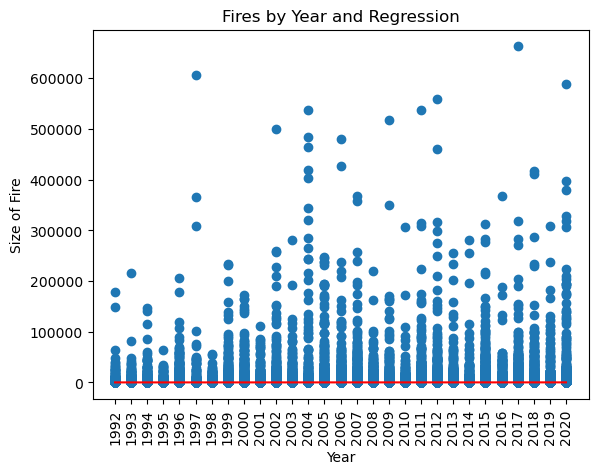

In [29]:
def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(fire_sizes_df["FIRE_YEAR"], fire_sizes_df["FIRE_SIZE"])
annotate(equation, 0, -3)
year = [year for year in fire_sizes_df["FIRE_YEAR"].unique()]
x_tick_locations = [value for value in year]
plt.xlabel("Year")
plt.ylabel("Size of Fire")
plt.xticks(x_tick_locations, rotation=90)
plt.title("Fires by Year and Regression")

plt.show()

In [31]:
fire_sizes_df.describe()

,FIRE_YEAR,FIRE_SIZE
count,2.303566e+06,2.303566e+06
mean,2.006167e+03,7.816088e+01
std,8.044361e+00,2.630832e+03
min,1.992000e+03,1.000000e-05
25%,2.000000e+03,1.000000e-01
50%,2.006000e+03,8.000000e-01
75%,2.013000e+03,3.000000e+00
max,2.020000e+03,6.627000e+05


<AxesSubplot:title={'center':'FIRE_SIZE'}, xlabel='FIRE_YEAR'>

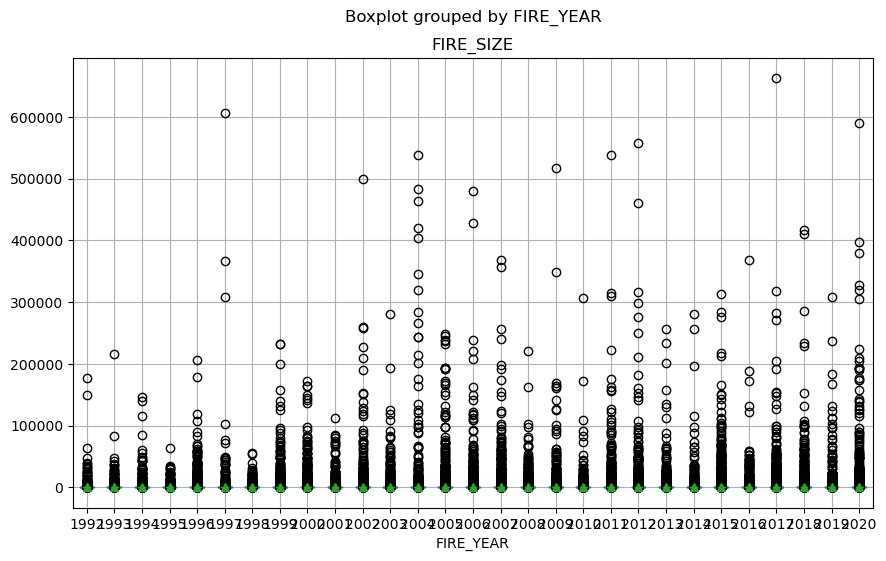

In [64]:
fire_sizes_df.boxplot(column='FIRE_SIZE', by='FIRE_YEAR', figsize=(10,6), showmeans=True, notch=True)
# plt.title("Fires by Year by Size")
# plt.ylabel('Size')
# plt.xlabel("Year")
#plt.show()

In [61]:
# fire_list = fires_df['DISCOVERY_DATE'].unique()
fire_list = fires_df.groupby(by=[fires_df['DISCOVERY_DATE'].index.month, fires_df['DISCOVERY_DATE'].index.year])
# b.groupby(by=[b.index.month, b.index.year])
# i = 0

# bank_pie = []

# while i < len(bank_list):
#     bank_pie.append(bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],['Total IB Fees']]['Total IB Fees'].sum())
#     i += 1

# _,_,inner_text = plt.pie(bank_pie, startangle=1, labels=bank_list, autopct='%1.1f%%',
#                          textprops={'size': 'large'}, colors=color_scheme)

# [inner_text[i].set_color('white') for i in range(len(inner_text))]
# plt.figure(1)
# plt.title("Investment Banking Fees, 2017-2021 Cumulative")

# plt.show()

AttributeError: 'RangeIndex' object has no attribute 'month'